In [302]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [303]:
def green(img):
    shape = np.shape(img)
    return np.count_nonzero(img==255)/(shape[0]*shape[1])
def show_images(im,hue_mask,huesat_mask):
    figwidth, figheight = plt.rcParams["figure.figsize"]
    fig, axes = plt.subplots(1, 3, figsize=(2 * figwidth, 1*figheight))
    
    axes[0].imshow(im)
    axes[1].imshow(hue_mask)
    axes[2].imshow(huesat_mask)

In [315]:
def one_img(filename,min_hue=35,max_hue=110,sat_min=0.1,display=False):
    read_from = f'Cropped/{filename}.png'
    
    im = Image.open(read_from).convert('HSV')
    Hue = np.array(im.getchannel('H'))
    rgb = Image.open(read_from).convert('RGB')
    a = np.asarray(rgb, int)
    
    m = np.min(a,2).T
    M = np.max(a,2).T
    C = M - m
    Cmsk = C != 0
    V = M
    print(V)
    S = np.zeros_like(Hue, float).T
    S[Cmsk] = ((C[Cmsk]) / V[Cmsk])
    
    hue_mask = np.zeros_like(Hue, dtype=np.uint8) 
    hue_mask[(Hue>min_hue) & (Hue<max_hue)] = 255
    
    huesat_mask = np.zeros_like(Hue, dtype=np.uint8) 
    huesat_mask[(Hue>min_hue) & (Hue<max_hue) & (S.T > sat_min)& (V > 0.15)] = 255
    
    if display:
        show_images(im,hue_mask,huesat_mask)
    
    huesat_img = Image.fromarray(huesat_mask)
    huesat_img.save(f'huesat/{filename}_{sat_min}.png')
    
    return green(huesat_mask)
    
def graph_it_all(filename,min_hue=35,max_hue=110,sat_min=0.1):
    arr = []
    r = 8
    c = 6
    for x in range(r):
        tmp = []
        for y in range(c):
            if x==0:
                tmp.append(one_img(f'{filename}_{x}_{y}',min_hue,max_hue,sat_min,display=True))
            else:
                tmp.append(one_img(f'{filename}_{x}_{y}',min_hue,max_hue,sat_min,display=False))
        arr.append(tmp)
    return arr

In [316]:
test1 = graph_it_all("screenshot",min_hue=35,max_hue=110,sat_min=0.1)
test2 = graph_it_all("screenshot",min_hue=35,max_hue=110,sat_min=0.15)
assert(test1 != test2)
#print(test1)
#print(test2)

[[ 73  90 173 ...  37  26  40]
 [ 55  47  53 ...  96  36  28]
 [ 49  49  45 ... 208 160 131]
 ...
 [235 250 234 ... 189  95 153]
 [ 79 107 196 ... 211 183 132]
 [ 62  64  83 ... 200 175 182]]


ValueError: operands could not be broadcast together with shapes (618,708) (708,618) 

False


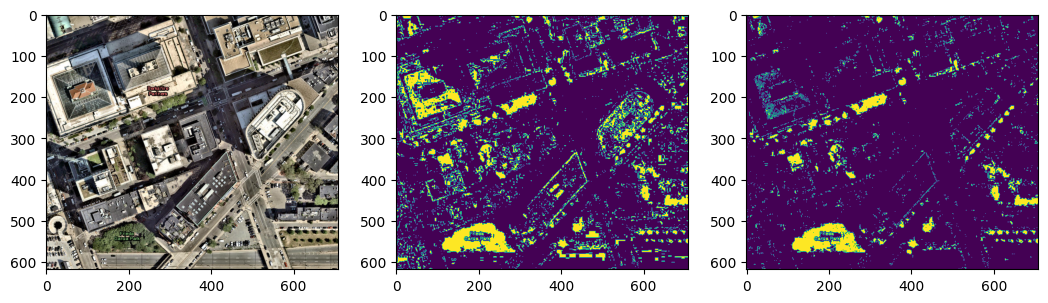

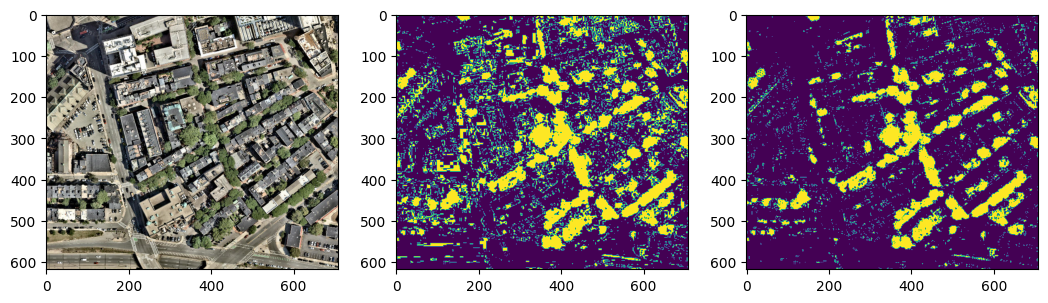

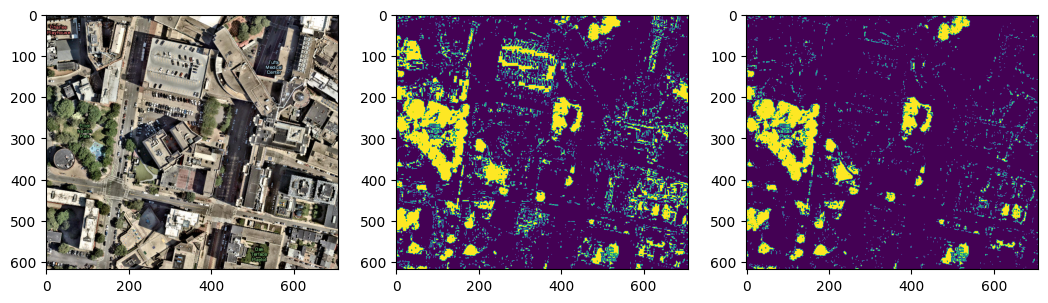

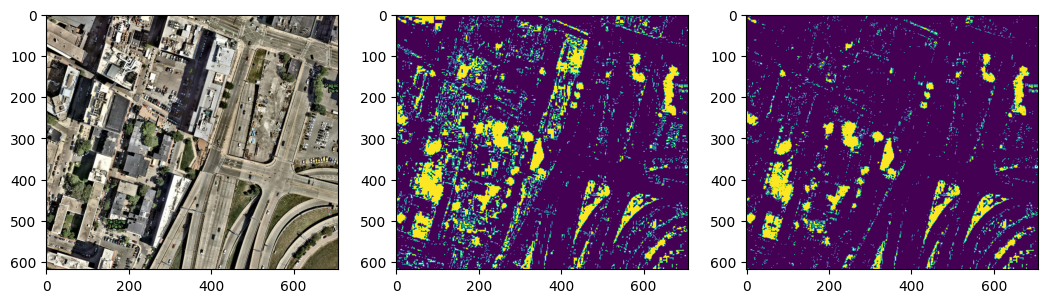

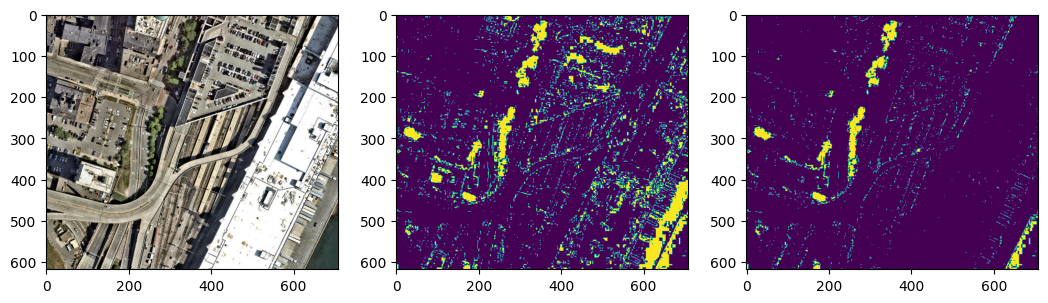

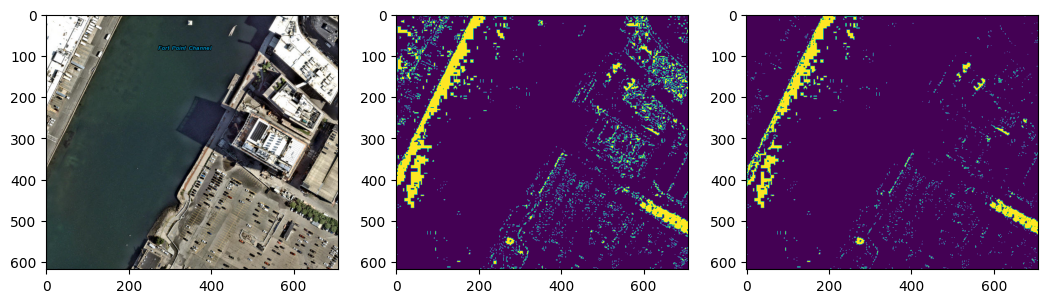

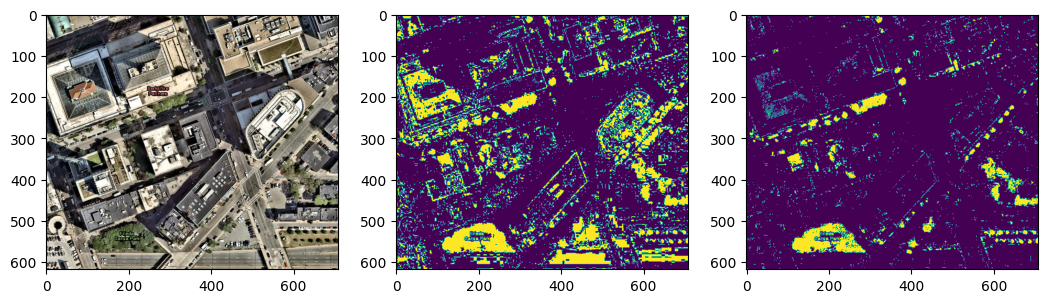

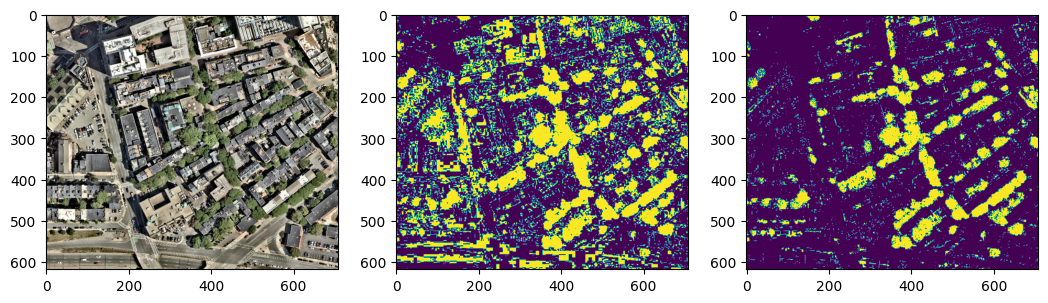

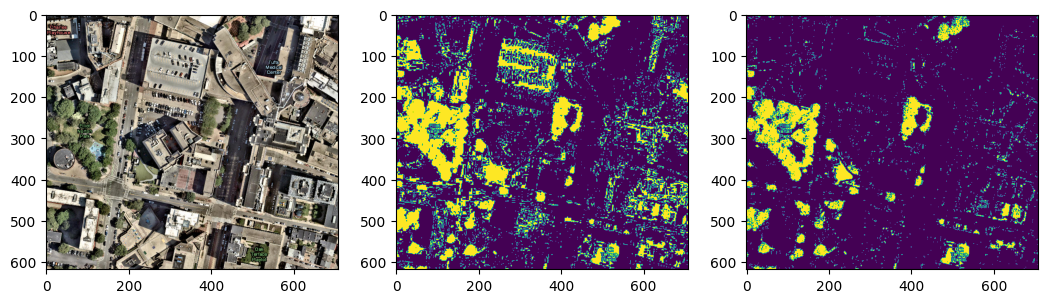

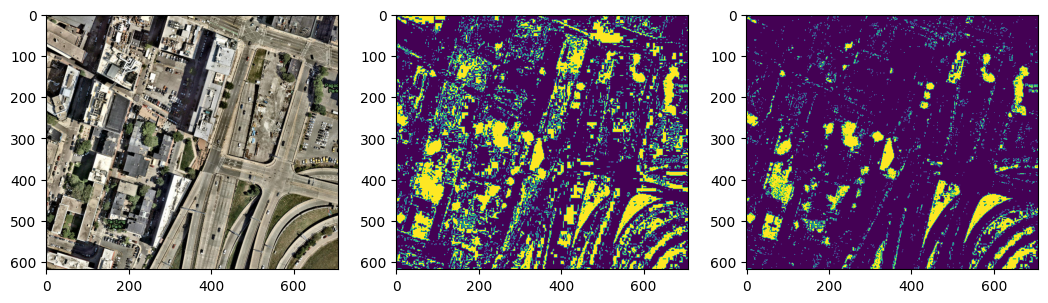

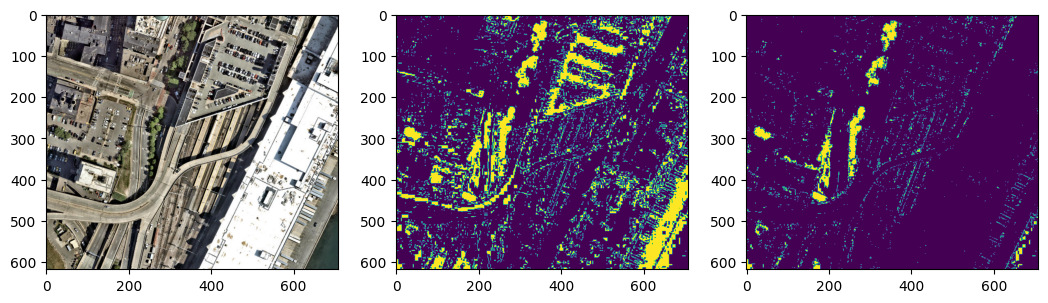

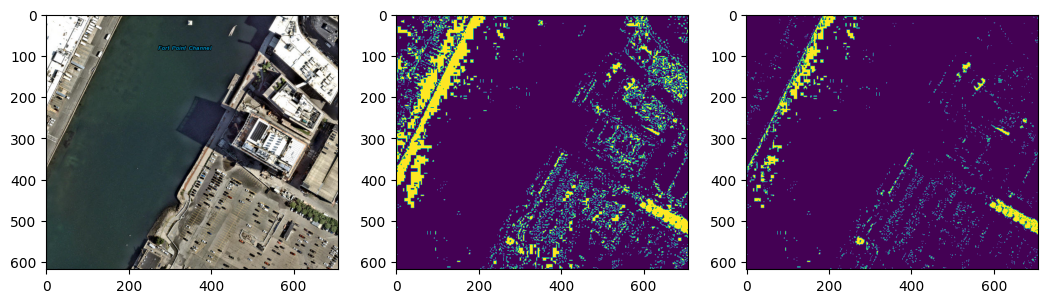

In [314]:
test1 = graph_it_all("screenshot",min_hue=40,max_hue=110,sat_min=0.15)

test2 = graph_it_all("screenshot",min_hue=35,max_hue=110,sat_min=0.2)

print(test1==test2)